<a href="https://colab.research.google.com/github/LeisaSousa/Teste/blob/main/Desafio_Frequencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Estatística Frequências e Medidas**
**Desafio Final**
Considerando a base de dados de enem_2023.json responda as questões
abaixo (os dados são fictícios).
Você é uma pesquisadora de um cursinho para estudantes que querem
ingressar na universidade em 2025. Seu objetivo é retirar informações da
base de dados do enem do ano anterior para alinhar melhor as estratégias do
cursinho para cada estudante.
O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o
gênero das pessoas que fizeram a prova. No dado existe a representação de
1000 pessoas, sendo cada uma delas uma linha.
1. Qual das disciplinas tem a maior amplitude de nota?
2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se
de remover todos os valores nulos quando considerar a mediana)
3. Considerando o curso de Ciência da Computação da UFPE, onde o peso
cada uma das disciplinas ponderado:
a. Redação - 2
b. Matemática e suas Tecnologias - 4
c. Linguagens, Códigos e suas Tecnologias - 2
d. Ciências Humanas e suas Tecnologias - 1
e. Ciências da Natureza e suas Tecnologias - 1
Qual o desvio padrão e média das notas dos 500 estudantes mais bem
colocados considerando esses pesos?
4. Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?
5. Qual o valor do teto do terceiro quartil para as disciplinas de
matemática e linguagens?
6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique
se não assimétricas?
7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])
8. Faça um boxplot do quartil de todas as disciplinas de ciências da
natureza e redação. É possível enxergar outliers? Utilize o método IQR.
9. Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente? (considere significativamente um
valor acima de 5%)
10. Considerando valores nulos, tente encontrar qual seria a melhor medida
de tendência que pode substituir as notas nulas. Média, moda ou
mediana? Substitua o valor por todos os três e diga qual delas altera
menos a média geral e o desvio padrão.

**Início: Construção dos comandos**

In [68]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import json as json


In [12]:
df = pd.read_json('/enem_2023.json')

In [20]:
df.head()


,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


1. **Qual das disciplinas tem a maior amplitude de nota?**





In [26]:
df.columns

Index(['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática',
       'Redação', 'Sexo'],
      dtype='object')

In [35]:
df.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [39]:

amplitude_df = df[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática','Redação']].max() - df.min()

# Maior amplitude
disciplina_maior = amplitude_df.idxmax()
maior_amplitude = amplitude_df.max()

print("Amplitude de notas x disciplina:")
print(amplitude_df)
print(f"\nA disciplina com maior amplitude de nota é {disciplina_maior} com {maior_amplitude:.2f}.")

Amplitude de notas x disciplina:
Ciências da natureza    487.604568
Ciências humanas        474.019695
Linguagens              517.456317
Matemática              488.077902
Redação                 729.160035
Sexo                           NaN
dtype: object

A disciplina com maior amplitude de nota é Redação com 729.16.


2. **Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se
de remover todos os valores nulos quando considerar a mediana)**

In [30]:
df[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática','Redação']].mean()

,0
Linguagens,514.524809
Ciências humanas,527.042281
Ciências da natureza,499.315583
Matemática,535.965660
Redação,637.783532


In [31]:
df[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática','Redação']].median()

,0
Linguagens,515.045250
Ciências humanas,524.519920
Ciências da natureza,500.479263
Matemática,533.247767
Redação,635.273973


3. **Considerando o curso de Ciência da Computação da UFPE, onde o peso
cada uma das disciplinas ponderado:**

a. Redação - 2

b. Matemática e suas Tecnologias - 4

c. Linguagens, Códigos e suas Tecnologias - 2

d. Ciências Humanas e suas Tecnologias - 1

e. Ciências da Natureza e suas Tecnologias - 1

**Qual o desvio padrão e média das notas dos 500 estudantes mais bem
colocados considerando esses pesos?**


In [51]:
pesos = {
    'Linguagens': 2,
    'Ciências humanas': 1,
    'Ciências da natureza': 1,
    'Matemática': 4,
    'Redação': 2
     }

In [52]:
# 500 estudantes melhores

df_500 = df.head(500)

In [93]:
# Média ponderada
nota_ponderada = df_top_500 * pd.Series(pesos)
soma_ponderada = nota_ponderada.sum(axis=1)
soma_pesos = sum(pesos.values())
media_ponderada = soma_ponderada.mean() / soma_pesos

print(f"\nA média ponderada é {media_ponderada}")


A média ponderada é 1479.0759277657764


In [89]:
# Desvio padrão ponderado
dif = df_500 * pd.Series(pesos) - media_ponderada
variancia_ponderada = (dif ** 2).sum(axis=1).mean() / soma_pesos
desvio_padrao = np.sqrt(variancia_ponderada)

print(f"\nO desvio padrão é {desvio_padrao}")


O desvio padrão é 2403.6464229837184


4. **Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?**

In [113]:
Alunos_40_estudantes = df.nlargest(40, 'Nota Ponderada')

In [116]:
# Média e a variância dos 40 estudantes
media_40 = Alunos_40_estudantes['Nota Ponderada'].mean()
variancia_40 = Alunos_40_estudantes['Nota Ponderada'].var()

print(f"Média das notas dos 40 melhores estudantes: {media_40:.2f}")
print(f"Variância das notas dos 40 melhores estudantes: {variancia_40:.2f}")

Média das notas dos 40 melhores estudantes: 1479.08
Variância das notas dos 40 melhores estudantes: 0.00


5. **Qual o valor do teto do terceiro quartil para as disciplinas de
matemática e linguagens?**



In [120]:
# Teto do terceiro quartil
Q3_matematica = df['Matemática'].quantile(0.75)
Q3_linguagens = df['Linguagens'].quantile(0.75)


# Arredondar para o teto
teto_Q3_matematica = np.ceil(Q3_matematica)
teto_Q3_linguagens = np.ceil(Q3_linguagens)

print(f"Teto do Q3 para Matemática: {teto_Q3_matematica:.2f}")
print(f"Teto do Q3 para Linguagens: {teto_Q3_linguagens:.2f}")


Teto do Q3 para Matemática: 2372.00
Teto do Q3 para Linguagens: 2287.00


6. **Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique
se não assimétricas?**

Desconsiderando os "zeros", os 2 gráficos são simetricos e possuem uma distribuição normal



<Axes: >

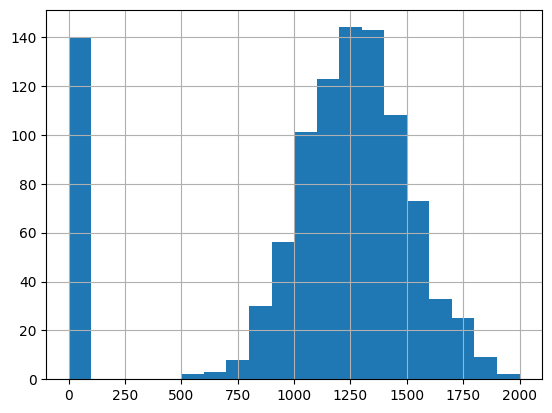

In [135]:
df[['Redação']]
df.fillna(0, inplace=True)
df.Redação.hist(bins=20)

<Axes: >

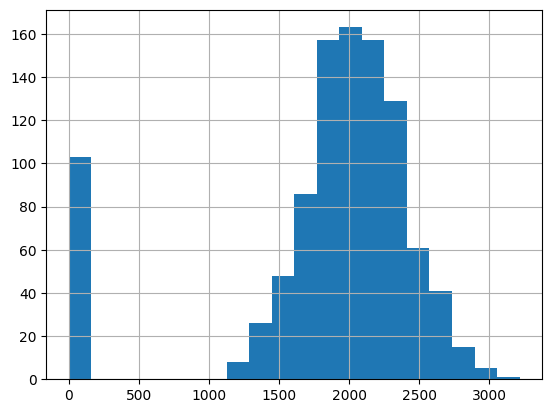

In [132]:
df[['Linguagens']]
df.fillna(0, inplace=True)
df.Linguagens.hist(bins=20)

7. **Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])**

Sim.

(array([103.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000.]),
 <BarContainer object of 20 artists>)

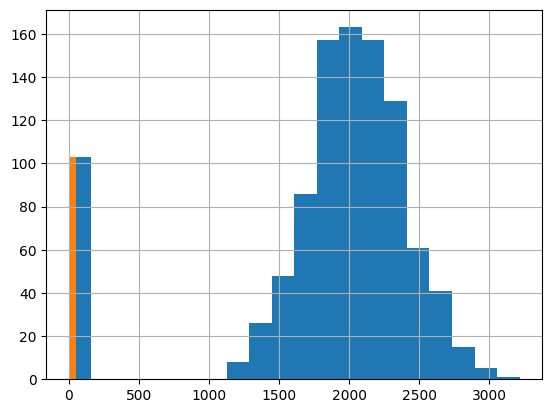

In [166]:
df[['Linguagens']]
df.fillna(0, inplace=True)
df.Linguagens.hist(bins=20)
plt.hist(df['Linguagens'], bins=20, range=[0, 1000])


(array([140.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   1.,   2.,   2.,   6.,  11.,  19.,  19.,  37.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000.]),
 <BarContainer object of 20 artists>)

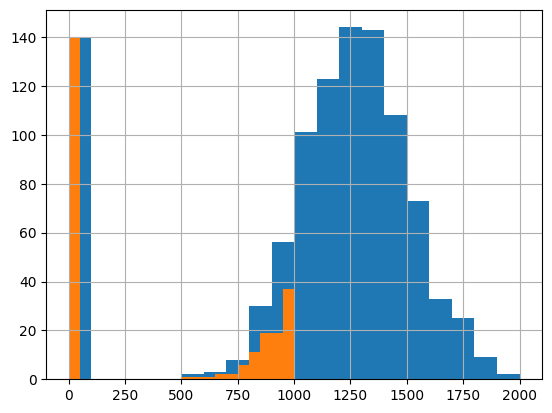

In [167]:
df[['Redação']]
df.fillna(0, inplace=True)
df.Redação.hist(bins=20)
plt.hist(df['Redação'], bins=20, range=[0, 1000])

8. **Faça um boxplot do quartil de todas as disciplinas de ciências da
natureza e redação. É possível enxergar outliers? Utilize o método IQR.**

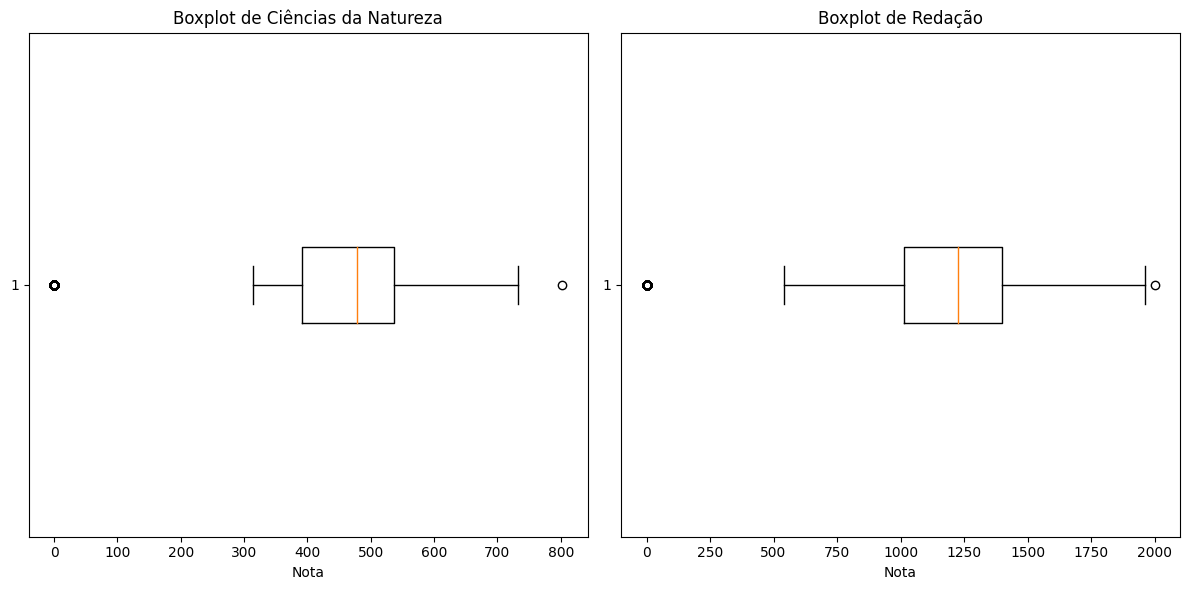

In [184]:
# Calcular quartis e IQR
def calcular_iqr(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    iqr = q3 - q1
    return q1, q3, iqr

# Ciências da Natureza
q1_ciencias, q3_ciencias, iqr_ciencias = calcular_iqr(df['Ciências da natureza'].dropna())
# Redação
q1_redacao, q3_redacao, iqr_redacao = calcular_iqr(df['Redação'].dropna())

# Outliers
def identificar_outliers(coluna, q1, q3, iqr):
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    return coluna[(coluna < limite_inferior) | (coluna > limite_superior)]

outliers_ciencias = identificar_outliers(df['Ciências da natureza'].dropna(), q1_ciencias, q3_ciencias, iqr_ciencias)
outliers_redacao = identificar_outliers(df['Redação'].dropna(), q1_redacao, q3_redacao, iqr_redacao)

# Plotar o boxplot
plt.figure(figsize=(12, 6))

# Boxplot para Ciências da Natureza
plt.subplot(1, 2, 1)
plt.boxplot(df['Ciências da natureza'].dropna(), vert=False)
plt.title('Boxplot de Ciências da Natureza')
plt.xlabel('Nota')

# Boxplot para Redação
plt.subplot(1, 2, 2)
plt.boxplot(df['Redação'].dropna(), vert=False)
plt.title('Boxplot de Redação')
plt.xlabel('Nota')

plt.tight_layout()
plt.show()



9. **Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente? (considere significativamente um
valor acima de 5%)**

In [186]:
# Função para calcular quartis e IQR
def calcular_iqr(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    iqr = q3 - q1
    return q1, q3, iqr

# Função para identificar e remover outliers
def remover_outliers(coluna):
    q1, q3, iqr = calcular_iqr(coluna.dropna())
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    return coluna[(coluna >= limite_inferior) & (coluna <= limite_superior)]

# Calcular média antes e depois da remoção dos outliers
def calcular_mudanca_media(coluna):
    media_original = coluna.mean()
    coluna_sem_outliers = remover_outliers(coluna)
    media_sem_outliers = coluna_sem_outliers.mean()
    mudanca = abs(media_original - media_sem_outliers) / media_original * 100
    return media_original, media_sem_outliers, mudanca

# Ciências da Natureza
media_natureza_original, media_natureza_sem_outliers, mudanca_natureza = calcular_mudanca_media(df['Ciências da natureza'])

# Redação
media_redacao_original, media_redacao_sem_outliers, mudanca_redacao = calcular_mudanca_media(df['Redação'])


print(f"Média original de Ciências da Natureza: {media_natureza_original:.2f}")
print(f"Média sem outliers de Ciências da Natureza: {media_natureza_sem_outliers:.2f}")
print(f"Porcentagem de mudança na média de Ciências da Natureza: {mudanca_natureza:.2f}%")
print(f"A mudança é significativa? {'Sim' if mudanca_natureza > 5 else 'Não'}")

print(f"Média original de Redação: {media_redacao_original:.2f}")
print(f"Média sem outliers de Redação: {media_redacao_sem_outliers:.2f}")
print(f"Porcentagem de mudança na média de Redação: {mudanca_redacao:.2f}%")
print(f"A mudança é significativa? {'Sim' if mudanca_redacao > 5 else 'Não'}")

Média original de Ciências da Natureza: 411.44
Média sem outliers de Ciências da Natureza: 498.95
Porcentagem de mudança na média de Ciências da Natureza: 21.27%
A mudança é significativa? Sim
Média original de Redação: 1096.99
Média sem outliers de Redação: 1274.72
Porcentagem de mudança na média de Redação: 16.20%
A mudança é significativa? Sim


10. **Considerando valores nulos, tente encontrar qual seria a melhor medida
de tendência que pode substituir as notas nulas. Média, moda ou
mediana? Substitua o valor por todos os três e diga qual delas altera
menos a média geral e o desvio padrão.**

In [189]:
# Funções para calcular média, moda e mediana
def substituir_e_calcular(coluna, valor_substituto):
    coluna_substituida = coluna.fillna(valor_substituto)
    return coluna_substituida.mean(), coluna_substituida.std()

# Média, moda e mediana
media = df['Ciências da natureza'].mean()
moda = df['Ciências da natureza'].mode()[0]
mediana = df['Ciências da natureza'].median()

# Substituição valores nulos + média e desvio padrão
resultados = {}
for metodo, substituto in [('Média', media), ('Moda', moda), ('Mediana', mediana)]:
    media_substituida, desvio_substituido = substituir_e_calcular(df['Ciências da natureza'], substituto)
    resultados[metodo] = (media_substituida, desvio_substituido)

# Resultado
print("Ciências da Natureza:")
for metodo, (media_substituida, desvio_substituido) in resultados.items():
    print(f"{metodo}: Média = {media_substituida:.2f}, Desvio Padrão = {desvio_substituido:.2f}")

# Visão Redação
media = df['Redação'].mean()
moda = df['Redação'].mode()[0]
mediana = df['Redação'].median()

resultados = {}
for metodo, substituto in [('Média', media), ('Moda', moda), ('Mediana', mediana)]:
    media_substituida, desvio_substituido = substituir_e_calcular(df['Redação'], substituto)
    resultados[metodo] = (media_substituida, desvio_substituido)

# Resultado para Redação
print("\nRedação:")
for metodo, (media_substituida, desvio_substituido) in resultados.items():
    print(f"{metodo}: Média = {media_substituida:.2f}, Desvio Padrão = {desvio_substituido:.2f}")

Ciências da Natureza:
Média: Média = 411.44, Desvio Padrão = 203.23
Moda: Média = 411.44, Desvio Padrão = 203.23
Mediana: Média = 411.44, Desvio Padrão = 203.23

Redação:
Média: Média = 1096.99, Desvio Padrão = 491.78
Moda: Média = 1096.99, Desvio Padrão = 491.78
Mediana: Média = 1096.99, Desvio Padrão = 491.78
